# Import Libraries

In [168]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt # Visualization
import matplotlib.dates as mdates # Formatting dates
import seaborn as sns # Visualization
from sklearn.preprocessing import MinMaxScaler
import torch # Library for implementing Deep Neural Network
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


# Load and Preprocess dataset

In [169]:
df = pd.read_csv('Biotech_preprocessed_dataset.csv')
df['Time'] = pd.to_datetime(df['Time'])
df['Date'] = df['Time'].dt.date
df.set_index('Date', inplace=True)
df

,Time,TOD,Total (W),Phase_A (W),Phase_B (W),Phase_C (W),Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Holiday
Date,,,,,,,,,,,,,,
2024-01-04,2024-01-04 15:00:00,15:00:00,821.0,207.0,467.0,147.0,False,False,False,False,True,False,False,False
2024-01-04,2024-01-04 16:00:00,16:00:00,741.0,298.0,329.0,114.0,False,False,False,False,True,False,False,False
2024-01-04,2024-01-04 17:00:00,17:00:00,776.0,363.0,278.0,135.0,False,False,False,False,True,False,False,False
2024-01-04,2024-01-04 18:00:00,18:00:00,1260.0,659.0,419.0,182.0,False,False,False,False,True,False,False,False
2024-01-04,2024-01-04 19:00:00,19:00:00,973.0,381.0,410.0,182.0,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-08,2024-07-08 05:00:00,05:00:00,1040.0,635.0,259.0,146.0,False,True,False,False,False,False,False,False
2024-07-08,2024-07-08 06:00:00,06:00:00,1414.0,1023.0,251.0,140.0,False,True,False,False,False,False,False,False
2024-07-08,2024-07-08 07:00:00,07:00:00,571.0,225.0,243.0,103.0,False,True,False,False,False,False,False,False


In [170]:
df_holiday = df[df['Holiday'] == True]
df_holiday

,Time,TOD,Total (W),Phase_A (W),Phase_B (W),Phase_C (W),Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Holiday
Date,,,,,,,,,,,,,,
2024-01-06,2024-01-06 00:00:00,00:00:00,732.0,196.0,349.0,187.0,False,False,True,False,False,False,False,True
2024-01-06,2024-01-06 01:00:00,01:00:00,1226.0,612.0,428.0,186.0,False,False,True,False,False,False,False,True
2024-01-06,2024-01-06 02:00:00,02:00:00,593.0,81.0,325.0,187.0,False,False,True,False,False,False,False,True
2024-01-06,2024-01-06 03:00:00,03:00:00,1148.0,644.0,317.0,187.0,False,False,True,False,False,False,False,True
2024-01-06,2024-01-06 04:00:00,04:00:00,655.0,81.0,386.0,188.0,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-06,2024-07-06 19:00:00,19:00:00,1667.0,1085.0,445.0,137.0,False,False,True,False,False,False,False,True
2024-07-06,2024-07-06 20:00:00,20:00:00,1628.0,1141.0,338.0,149.0,False,False,True,False,False,False,False,True
2024-07-06,2024-07-06 21:00:00,21:00:00,1013.0,482.0,385.0,146.0,False,False,True,False,False,False,False,True


In [171]:
df_office_day = df[df['Holiday'] == False]
df_office_day

,Time,TOD,Total (W),Phase_A (W),Phase_B (W),Phase_C (W),Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Holiday
Date,,,,,,,,,,,,,,
2024-01-04,2024-01-04 15:00:00,15:00:00,821.0,207.0,467.0,147.0,False,False,False,False,True,False,False,False
2024-01-04,2024-01-04 16:00:00,16:00:00,741.0,298.0,329.0,114.0,False,False,False,False,True,False,False,False
2024-01-04,2024-01-04 17:00:00,17:00:00,776.0,363.0,278.0,135.0,False,False,False,False,True,False,False,False
2024-01-04,2024-01-04 18:00:00,18:00:00,1260.0,659.0,419.0,182.0,False,False,False,False,True,False,False,False
2024-01-04,2024-01-04 19:00:00,19:00:00,973.0,381.0,410.0,182.0,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-08,2024-07-08 05:00:00,05:00:00,1040.0,635.0,259.0,146.0,False,True,False,False,False,False,False,False
2024-07-08,2024-07-08 06:00:00,06:00:00,1414.0,1023.0,251.0,140.0,False,True,False,False,False,False,False,False
2024-07-08,2024-07-08 07:00:00,07:00:00,571.0,225.0,243.0,103.0,False,True,False,False,False,False,False,False


<Axes: xlabel='Date'>

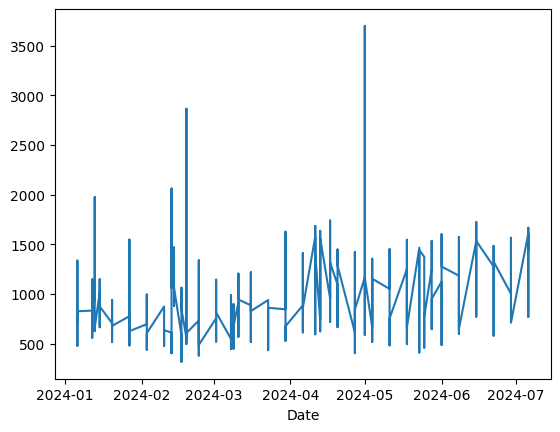

In [172]:
df_holiday['Total (W)'].plot()

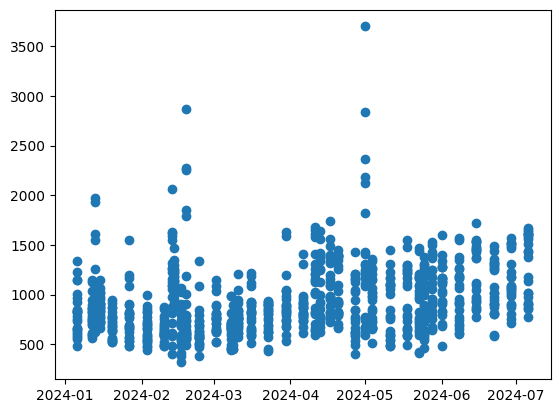

In [173]:
plt.scatter(df_holiday.index, df_holiday['Total (W)'])
plt.show()

<Axes: xlabel='Date'>

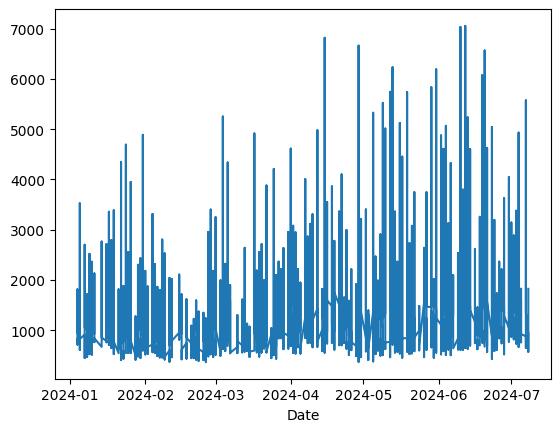

In [174]:
df_office_day['Total (W)'].plot()

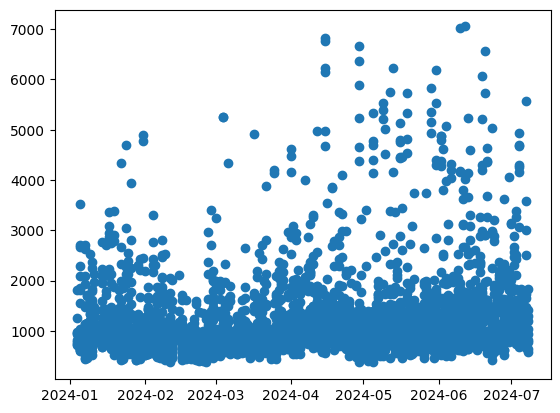

In [175]:
plt.scatter(df_office_day.index, df_office_day['Total (W)'])
plt.show()

In [176]:
print(df_holiday['Total (W)'].mean())
print(df_office_day['Total (W)'].mean())

922.5694444444445
1222.2330400227079


**Drop Unnecessary columns** \
We are going to forecast total load based only on the previous values of total load. So, we wiil keep only the 'Total (W)' column.

In [177]:
df_office_day = pd.DataFrame(df_office_day['Total (W)'])
df_office_day

,Total (W)
Date,
2024-01-04,821.0
2024-01-04,741.0
2024-01-04,776.0
2024-01-04,1260.0
2024-01-04,973.0
...,...
2024-07-08,1040.0
2024-07-08,1414.0
2024-07-08,571.0


In [178]:
df_holiday = pd.DataFrame(df_holiday['Total (W)'])
df_holiday

,Total (W)
Date,
2024-01-06,732.0
2024-01-06,1226.0
2024-01-06,593.0
2024-01-06,1148.0
2024-01-06,655.0
...,...
2024-07-06,1667.0
2024-07-06,1628.0
2024-07-06,1013.0


**Separate train and test data**

In [179]:
training_data_len = int(len(df_holiday)*0.8)
print(training_data_len)

train_data = df_holiday[:training_data_len]
test_data = df_holiday[training_data_len:]

print(train_data.shape, test_data.shape)

748
(748, 1) (188, 1)


In [180]:
dataset_train = train_data['Total (W)'].values
dataset_train = np.reshape(dataset_train, (-1, 1))
dataset_train.shape


(748, 1)

In [181]:
dataset_test = test_data['Total (W)'].values
dataset_test = np.reshape(dataset_test, (-1, 1))
dataset_test.shape

(188, 1)

**Scaling**

In [182]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_train = scaler.fit_transform(dataset_train)
scaled_test = scaler.fit_transform(dataset_test)
print(scaled_train[:5])
print(scaled_test[:5])

[[-0.75406444]
 [-0.46201596]
 [-0.83624002]
 [-0.50812888]
 [-0.79958617]]
[[-0.47509881]
 [ 0.33596838]
 [ 0.32806324]
 [-0.78498024]
 [-0.4798419 ]]


**Create Sequences**

In [183]:
sequence_length =
X_train, y_train = [], []
for i in range(len(scaled_train)-sequence_length):
  X_train.append(scaled_train[i:i+sequence_length])
  y_train.append(scaled_train[i+1:i+sequence_length+1])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape, y_train.shape

((742, 6, 1), (742, 6, 1))

In [184]:
X_test, y_test = [], []
for i in range(len(scaled_test)-sequence_length):
  X_test.append(scaled_test[i:i+sequence_length])
  y_test.append(scaled_test[i+1:i+sequence_length+1])
X_test, y_test = np.array(X_test), np.array(y_test)


**Convert to Tensors**

In [185]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
print(X_train.shape, y_train.shape)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
print(X_test.shape, y_test.shape)

torch.Size([742, 6, 1]) torch.Size([742, 6, 1])
torch.Size([182, 6, 1]) torch.Size([182, 6, 1])


# Create Model

In [186]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(LSTM, self).__init__()
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)

  def forward(self, x):
    out, _ = self.lstm(x)
    out = self.fc(out)
    return out


In [187]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cpu


In [188]:
input_size = 1
num_layers = 1
hidden_size = 32
output_size = 1

model = LSTM(input_size, hidden_size, num_layers).to(device)
loss_fn = torch.nn.MSELoss(reduction='mean')

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)

LSTM(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


**Torch Dataloader**

In [189]:
batch_size = 32
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle=False)

In [190]:
for x, y in train_loader:
	print(f'X shape: {x.shape}, y shape: {y.shape}')
	break

X shape: torch.Size([32, 6, 1]), y shape: torch.Size([32, 6, 1])


# Train the Model

In [191]:
num_epochs = 100
train_loss_hist =[]
test_loss_hist =[]
train_mae_hist = []
test_mae_hist = []
# Training loop
for epoch in range(num_epochs):
	total_loss = 0.0
	total_mae = 0.0

	# Training
	model.train()
	for batch_X, batch_y in train_loader:
		batch_X, batch_y = batch_X.to(device), batch_y.to(device)
		predictions = model(batch_X)
		loss = loss_fn(predictions, batch_y)

		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		total_loss += loss.item()
		total_mae += torch.mean(torch.abs((predictions - batch_y)/(batch_y+1e-8))*100.0)

	# Calculate average training loss and accuracy
	average_loss = total_loss / len(train_loader)
	train_loss_hist.append(average_loss)
	average_mae = total_mae / len(train_loader)
	train_mae_hist.append(average_mae)

	# Validation on test data
	model.eval()
	with torch.no_grad():
		total_test_loss = 0.0
		total_test_mae = 0.0

		for batch_X_test, batch_y_test in test_loader:
			batch_X_test, batch_y_test = batch_X_test.to(device), batch_y_test.to(device)
			predictions_test = model(batch_X_test)
			test_loss = loss_fn(predictions_test, batch_y_test)

			total_test_mae += torch.mean(torch.abs((predictions_test - batch_y_test)/(batch_y_test+1e-8))*100.0)
			total_test_loss += test_loss.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(test_loader)
		test_loss_hist.append(average_test_loss)
		average_test_mae = total_test_mae / len(test_loader)
		test_mae_hist.append(average_test_mae)
	if (epoch+1)%10==0:
		print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}')


Epoch [10/100] - Training Loss: 0.0326, Test Loss: 0.3955
Epoch [20/100] - Training Loss: 0.0302, Test Loss: 0.3660
Epoch [30/100] - Training Loss: 0.0305, Test Loss: 0.3528
Epoch [40/100] - Training Loss: 0.0299, Test Loss: 0.3357
Epoch [50/100] - Training Loss: 0.0300, Test Loss: 0.3276
Epoch [60/100] - Training Loss: 0.0302, Test Loss: 0.3247
Epoch [70/100] - Training Loss: 0.0288, Test Loss: 0.3145
Epoch [80/100] - Training Loss: 0.0289, Test Loss: 0.3081
Epoch [90/100] - Training Loss: 0.0283, Test Loss: 0.3073
Epoch [100/100] - Training Loss: 0.0278, Test Loss: 0.3191


In [192]:
train_mae_hist

[tensor(67.6744, grad_fn=<DivBackward0>),
 tensor(47.2138, grad_fn=<DivBackward0>),
 tensor(43.3069, grad_fn=<DivBackward0>),
 tensor(42.1053, grad_fn=<DivBackward0>),
 tensor(41.0038, grad_fn=<DivBackward0>),
 tensor(38.0980, grad_fn=<DivBackward0>),
 tensor(36.6024, grad_fn=<DivBackward0>),
 tensor(35.5102, grad_fn=<DivBackward0>),
 tensor(36.2937, grad_fn=<DivBackward0>),
 tensor(35.6102, grad_fn=<DivBackward0>),
 tensor(34.1617, grad_fn=<DivBackward0>),
 tensor(34.3219, grad_fn=<DivBackward0>),
 tensor(35.4254, grad_fn=<DivBackward0>),
 tensor(34.1491, grad_fn=<DivBackward0>),
 tensor(33.8970, grad_fn=<DivBackward0>),
 tensor(34.5955, grad_fn=<DivBackward0>),
 tensor(33.8967, grad_fn=<DivBackward0>),
 tensor(33.6141, grad_fn=<DivBackward0>),
 tensor(33.3141, grad_fn=<DivBackward0>),
 tensor(33.1858, grad_fn=<DivBackward0>),
 tensor(33.7601, grad_fn=<DivBackward0>),
 tensor(33.1875, grad_fn=<DivBackward0>),
 tensor(33.3015, grad_fn=<DivBackward0>),
 tensor(33.2359, grad_fn=<DivBackw

In [193]:
test_mae_hist

[tensor(817.1037),
 tensor(771.1852),
 tensor(786.4688),
 tensor(796.0737),
 tensor(785.5541),
 tensor(715.0352),
 tensor(631.8256),
 tensor(577.1636),
 tensor(515.8394),
 tensor(498.1689),
 tensor(495.2340),
 tensor(489.7494),
 tensor(463.5332),
 tensor(455.8613),
 tensor(458.6460),
 tensor(446.1187),
 tensor(420.1267),
 tensor(411.3607),
 tensor(412.7575),
 tensor(409.6847),
 tensor(401.8462),
 tensor(402.0265),
 tensor(395.8846),
 tensor(389.8515),
 tensor(386.0992),
 tensor(371.6723),
 tensor(370.6840),
 tensor(380.4797),
 tensor(368.3899),
 tensor(366.6319),
 tensor(371.6479),
 tensor(367.2957),
 tensor(352.8989),
 tensor(343.0873),
 tensor(341.6328),
 tensor(348.8228),
 tensor(345.6522),
 tensor(344.0569),
 tensor(330.7499),
 tensor(316.8612),
 tensor(323.0033),
 tensor(314.7502),
 tensor(316.8978),
 tensor(316.9980),
 tensor(306.3620),
 tensor(299.8270),
 tensor(299.9095),
 tensor(278.8151),
 tensor(286.1823),
 tensor(278.8678),
 tensor(268.7927),
 tensor(271.6615),
 tensor(267.

# Plots

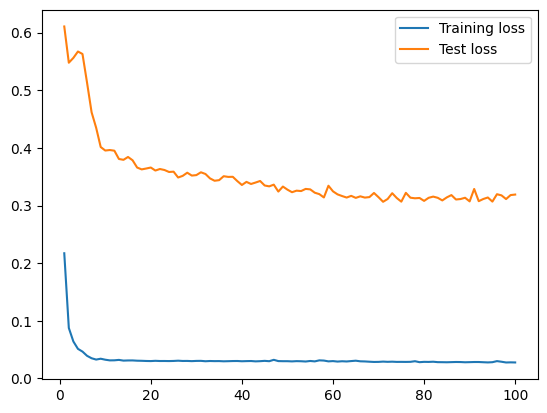

In [194]:
x = np.linspace(1,num_epochs,num_epochs)
plt.plot(x,train_loss_hist,scalex=True, label="Training loss")
plt.plot(x, test_loss_hist, label="Test loss")
plt.legend()
plt.show()
